<a href="https://colab.research.google.com/github/Neu-Utkarsh/Binary-Digit-Classification/blob/main/Binary-Digit-Classification/Multiclass%20Classification/RockPaperScissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ipywidgets import widgets

import zipfile
import tensorflow as tf

In [2]:


url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
zip_path = tf.keras.utils.get_file('rps.zip', origin=url, extract=False)

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')

200682221/200682221 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [3]:
BASE_DIR = './rps'

rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

print(f'total training rock images: {len(os.listdir(rock_dir))}')
print(f'total training paper images: {len(os.listdir(paper_dir))}')
print(f'total training scissors images: {len(os.listdir(scissors_dir))}')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print()
print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")

total training rock images: 840
total training paper images: 840
total training scissors images: 840

5 files in the rock subdir: ['rock05ck01-101.png', 'rock02-090.png', 'rock02-098.png', 'rock05ck01-072.png', 'rock03-103.png']
5 files in the paper subdir: ['paper07-007.png', 'paper02-078.png', 'paper04-093.png', 'paper01-046.png', 'paper04-050.png']
5 files in the scissors subdir: ['scissors03-086.png', 'testscissors02-119.png', 'scissors03-097.png', 'scissors01-022.png', 'scissors04-114.png']


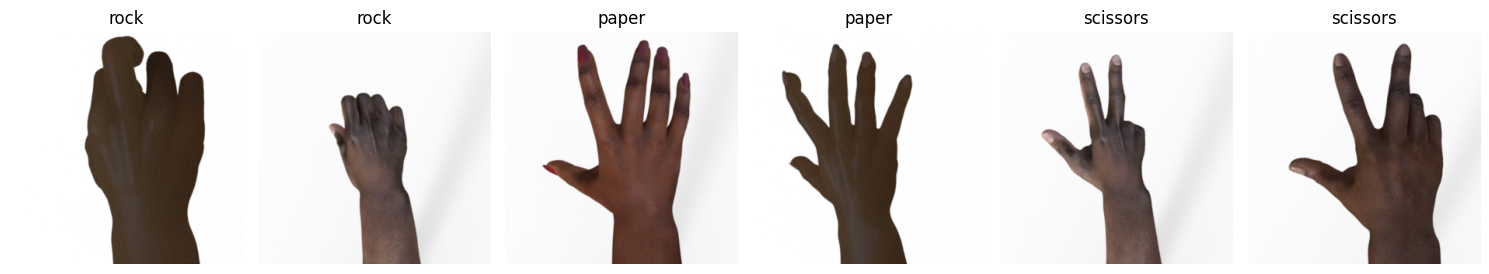

In [4]:
next_rock = [os.path.join(rock_dir, fname)
             for fname in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, fname)
              for fname in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, fname)
                 for fname in random.sample(scissors_files, k=2)]

fig, axes = plt.subplots(1, 6, figsize=(15, 5))  # 1 row, 6 columns

all_images = next_rock + next_paper + next_scissors

for ax, img_path in zip(axes, all_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Axis hatana
    ax.set_title(img_path.split('/')[-2])  # Class name dikhana

plt.tight_layout()
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

# Not recommended method

**Was not able to download the test dataset so instead splitted the data in validaton manually from the training data itself**



In [6]:
TRAINING_DIR = "./rps"

# Define the proportion of data to use for validation
validation_split = 0.2
seed = 123 # for reproducible split

# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
    validation_split=validation_split,
    subset='training',
    seed=seed
    )

# Instantiate the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR, # Use the same directory
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
    validation_split=validation_split,
    subset='validation',
    seed=seed
    )

# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 2520 files belonging to 3 classes.
Using 2016 files for training.
Found 2520 files belonging to 3 classes.
Using 504 files for validation.


In [7]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

# Attach the data augmentation model to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [8]:
model_with_aug.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
# Train the model
history = model_with_aug.fit(
    train_dataset_final,
    epochs=25,
    validation_data = validation_dataset_final,
    verbose = 1
)

Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.3231 - loss: 1.3068 - val_accuracy: 0.3175 - val_loss: 1.0957
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3602 - loss: 1.1014 - val_accuracy: 0.3353 - val_loss: 1.0995
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3789 - loss: 1.0880 - val_accuracy: 0.5238 - val_loss: 1.0110
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4415 - loss: 1.0381 - val_accuracy: 0.5139 - val_loss: 0.8380
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5406 - loss: 0.9175 - val_accuracy: 0.8016 - val_loss: 0.5711
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6164 - loss: 0.8091 - val_accuracy: 0.8770 - val_loss: 0.3586
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7183 - loss: 0.6302 - val_accuracy: 0.9504 - val_loss: 0.2091
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7597 - loss: 0.5327 - val_accuracy: 0.9663 - 

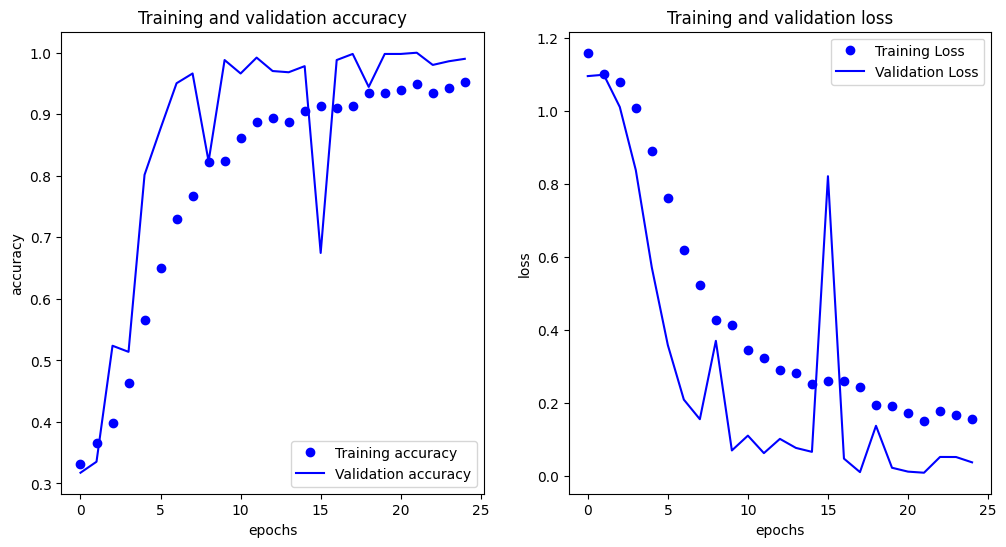

In [10]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

# Upload iMages as required
I just tested with dogs/cats images😂 but none has accuracy more than 0.8

In [12]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')

        prediction_index = np.argmax(prediction)

        classes = ["paper", "rock", "scissors"]

        predicted_class = classes[prediction_index]

        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    uploaded_files = change.new
    for filename, file_info in uploaded_files.items(): # Loop through the uploaded files
        file_jpgdata = BytesIO(file_info['content']) # Access content from the dictionary
        file_predict(filename, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()